
**Comparative Performance Analysis for Predicting Sea Level Rise Using Linear Regression and Support Vector Machine**
Objective:
In this assignment, you will analyze sea level data to predict the rise in sea levels over time using linear regression and support vector machine (SVM). You will perform data cleaning, modeling, and visualize the results. Your predictions will be used to estimate future sea levels.

**Deliverable** Upload your completed code to Canvas within the due date.

Dataset:
The dataset contains historical data on sea level measurements from the CSIRO (Commonwealth Scientific and Industrial Research Organisation). The columns of the dataset are as follows:

-- Year: The year of the measurement.

-- CSIRO Adjusted Sea Level: The adjusted sea level measurement (in millimeters).

-- Lower Error Bound: The lower bound of the sea level measurement.

-- Upper Error Bound: The upper bound of the sea level measurement.

-- NOAA Adjusted Sea Level: The NOAA adjusted sea level (containing missing values).

### Tasks: Write the code for each of the following:

* Task 1: Data Exploration and Preprocessing

-- Load and Explore the Data:

-- Load the dataset into a Pandas DataFrame.

-- Display the first few rows of the dataset to understand its structure.

-- Identify and handle any missing data.

-- Describe the dataset and summarize the statistics:


-- Identify any potential outliers or anomalies in the data.



* Task 2: Focused Prediction from Year 2000 to Present



-- Filter the data from the year 2000 to the most recent year available in the dataset.

-- Shuffle the dataset and Split the dataset into 70% train and 30% test.

-- Fit a linear regression and SVM model based on the 70% of the dataset (from 2000 to the most recent year). Use the SKLearn library.

-- Visualize the observed data and the fitted regression line for this range of years.

-- Display the values of all the weights (coefficients) obtained from Linear Regression and SVM.

* Task 3: Predict Sea Level in 2040 Using the SVM and Linear Regression:

-- Using the linear regression model and SVM (from the year 2000 onwards), predict the sea level rise using the 30% test.

-- Report the predicted sea levels from both the models.

* Task 4: Reflection and Analysis

-- Compare the predicted sea level for 2030  and 2040 from both the models.

-- Discuss how the different models might lead to different predictions and why this is the case.

* Task 5: Interpretation of Results:

-- Report a metric that you used to compare the performance of the Linear Regression and SVM. Which model performed the best?

-- Explain how the regression models are helping us understand the relationship between the year and the sea level rise.



# TASK 1: Data Exploration and Preprocessing

In [575]:
import pandas as pd

# Load and Explore the Data: Load the dataset into a Pandas DataFrame.
df = pd.read_csv('epa-sea-level.csv')
print(df)

# Display the first few rows of the dataset to understand its structure.
print(df.head(5))
print(df.tail(5))


     Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0    1880                  0.000000          -0.952756           0.952756   
1    1881                  0.220472          -0.732283           1.173228   
2    1882                 -0.440945          -1.346457           0.464567   
3    1883                 -0.232283          -1.129921           0.665354   
4    1884                  0.590551          -0.283465           1.464567   
..    ...                       ...                ...                ...   
129  2009                  8.586614           8.311024           8.862205   
130  2010                  8.901575           8.618110           9.185039   
131  2011                  8.964567           8.661417           9.267717   
132  2012                  9.326772           8.992126           9.661417   
133  2013                  8.980315           8.622047           9.338583   

     NOAA Adjusted Sea Level  
0                        NaN  
1            

In [576]:
# Identify and handle any missing data.
print("Missing values per column:")
print(df.isnull().sum())
df = df[['Year', 'CSIRO Adjusted Sea Level']]
print(df.isnull().sum())
print(df)
df = df.dropna()

df

Missing values per column:
Year                          0
CSIRO Adjusted Sea Level      0
Lower Error Bound             0
Upper Error Bound             0
NOAA Adjusted Sea Level     113
dtype: int64
Year                        0
CSIRO Adjusted Sea Level    0
dtype: int64
     Year  CSIRO Adjusted Sea Level
0    1880                  0.000000
1    1881                  0.220472
2    1882                 -0.440945
3    1883                 -0.232283
4    1884                  0.590551
..    ...                       ...
129  2009                  8.586614
130  2010                  8.901575
131  2011                  8.964567
132  2012                  9.326772
133  2013                  8.980315

[134 rows x 2 columns]


,Year,CSIRO Adjusted Sea Level
0,1880,0.000000
1,1881,0.220472
2,1882,-0.440945
3,1883,-0.232283
4,1884,0.590551
...,...,...
129,2009,8.586614
130,2010,8.901575
131,2011,8.964567
132,2012,9.326772


We drop the columns of the NOAA Adjusted Sea Level as that is the only feature that contains NaN values. It would be harmful to remove the rows as we would lose the data, so instead, we drop the entire column. 

Additionally, the only input necessary in relation to sea level is the year, so we would remove all other columns

In [577]:

#  Describe the dataset and summarize the statistics:
print(df.head())
print(df.describe())

   Year  CSIRO Adjusted Sea Level
0  1880                  0.000000
1  1881                  0.220472
2  1882                 -0.440945
3  1883                 -0.232283
4  1884                  0.590551
              Year  CSIRO Adjusted Sea Level
count   134.000000                134.000000
mean   1946.500000                  3.650341
std      38.826537                  2.485692
min    1880.000000                 -0.440945
25%    1913.250000                  1.632874
50%    1946.500000                  3.312992
75%    1979.750000                  5.587598
max    2013.000000                  9.326772


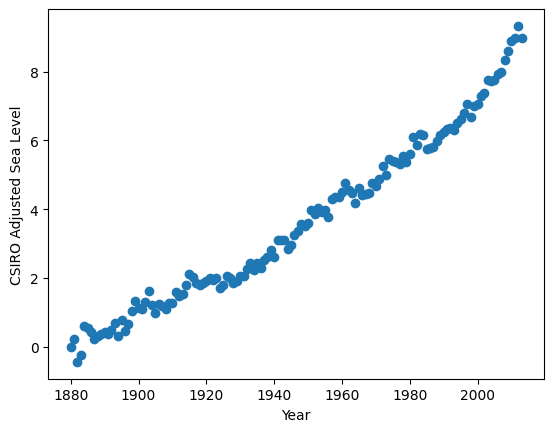

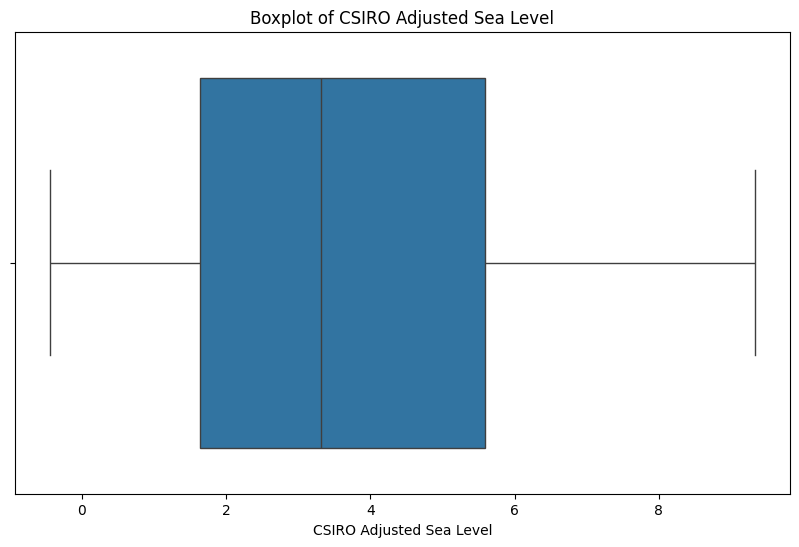

In [593]:
# Identify any potential outliers or anomalies in the data.
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(x=df["Year"], y=df["CSIRO Adjusted Sea Level"])
plt.xlabel("Year")
plt.ylabel("CSIRO Adjusted Sea Level")
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["CSIRO Adjusted Sea Level"])
plt.title("Boxplot of CSIRO Adjusted Sea Level")
plt.show()

The significance of this box plot represents no outliers in our dataset. We could assume that our linear regression later will not be as inaccurate from influences to outliers. 

# TASK 2: Focused Prediction from Year 2000 to Present


     Year  CSIRO Adjusted Sea Level
120  2000                  7.062992
121  2001                  7.287402
122  2002                  7.381890
123  2003                  7.759843
124  2004                  7.740157
125  2005                  7.744094
126  2006                  7.917323
127  2007                  7.996063
128  2008                  8.350394
129  2009                  8.586614
130  2010                  8.901575
131  2011                  8.964567
132  2012                  9.326772
133  2013                  8.980315


Text(0, 0.5, 'CSIRO Adjusted Sea Level')

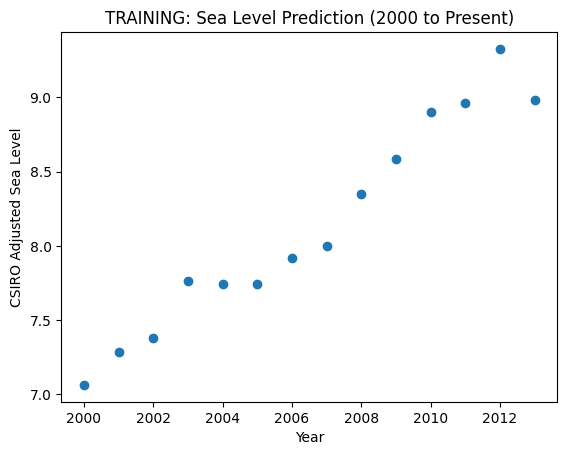

In [579]:
# Filter the data from the year 2000 to the most recent year available in the dataset.
df_2000 = df[df["Year"] >= 2000].copy()
print(df_2000)
plt.scatter(x=df_2000["Year"], y=df_2000["CSIRO Adjusted Sea Level"])
plt.title('TRAINING: Sea Level Prediction (2000 to Present)')
plt.xlabel("Year")
plt.ylabel("CSIRO Adjusted Sea Level")


In [580]:
# Shuffle the dataset and Split the dataset into 70% train and 30% test.
from sklearn.model_selection import train_test_split
X = df_2000[["Year"]]
Y = df_2000["CSIRO Adjusted Sea Level"]
x_train, x_test,y_train,y_test = train_test_split(X,Y,train_size=0.7,shuffle=True)

In [581]:
# Fit a linear regression and SVM model based on the 70% of the dataset (from 2000 to the most recent year). Use the SKLearn library.
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [582]:
from sklearn.svm import SVR
svm_model = SVR(kernel='linear')
svm_model.fit(x_train, y_train)

SVR(kernel='linear')

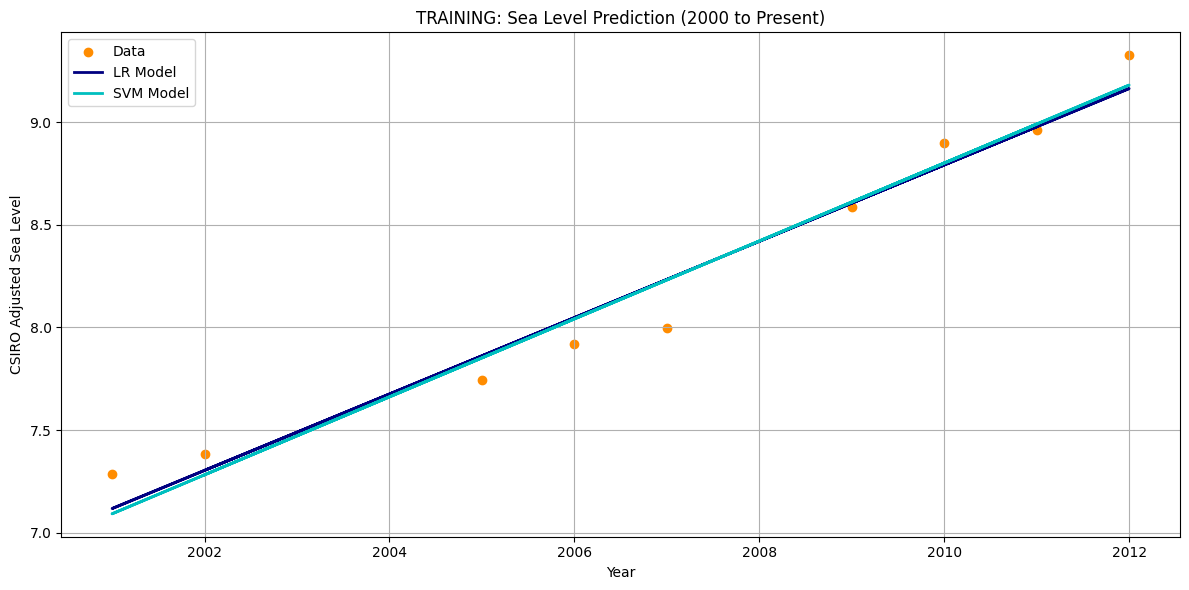

In [583]:
# Visualize the observed data and the fitted regression line for this range of years.

import numpy as np
import matplotlib.pyplot as plt

lr_pred = lr_model.predict(x_train)
svm_pred = svm_model.predict(x_train)


# Plot results
plt.figure(figsize=(12, 6))
plt.scatter(x_train, y_train, color='darkorange', label='Data')
plt.plot(x_train, lr_pred, color='navy', lw=2, label='LR Model')
plt.plot(x_train, svm_pred, color='c', lw=2, label='SVM Model')
plt.xlabel("Year")
plt.ylabel("CSIRO Adjusted Sea Level")
plt.title('TRAINING: Sea Level Prediction (2000 to Present)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



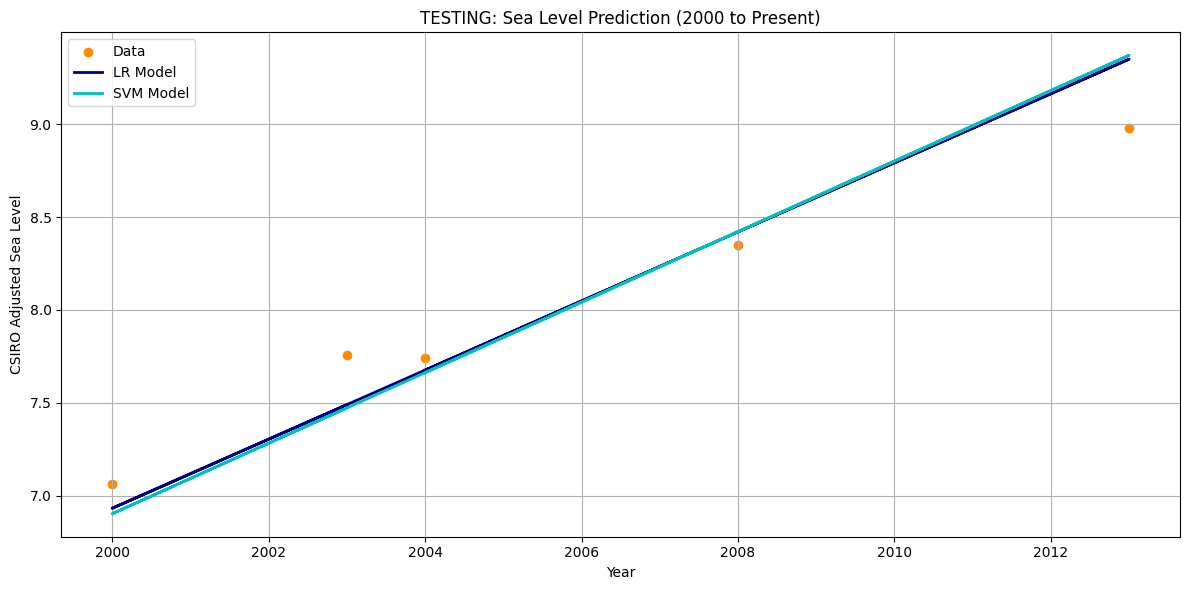

In [584]:
lr_pred_test= lr_model.predict(x_test)
svm_pred_test = svm_model.predict(x_test)

# Plot results
plt.figure(figsize=(12, 6))
plt.scatter(x_test, y_test, color='darkorange', label='Data')
plt.plot(x_test, lr_pred_test, color='navy', lw=2, label='LR Model')
plt.plot(x_test, svm_pred_test, color='c', lw=2, label='SVM Model')
plt.xlabel("Year")
plt.ylabel("CSIRO Adjusted Sea Level")
plt.title('TESTING: Sea Level Prediction (2000 to Present)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [585]:
# Display the values of all the weights (coefficients) obtained from Linear Regression and SVM.
print("Linear Regression Coefficients:")
print(f"Slope (Weight): {lr_model.coef_[0]:.4f}")
print(f"Bias: {lr_model.intercept_}")

print("\nSVM Coefficients:")
print(f"Slope (Weight): {svm_model.coef_[0][0]:.4f}")
print(f"Bias: {svm_model.intercept_[0]}")

Linear Regression Coefficients:
Slope (Weight): 0.1861
Bias: -365.2470687833918

SVM Coefficients:
Slope (Weight): 0.1900
Bias: -373.01929097910215


# TASK 3: Predict Sea Level in 2040 Using the SVM and Linear Regression:

In [586]:
# Report the predicted sea levels from both the models.
print("Linear Regression (first 5 predictions):", lr_pred_test[:5])
print("SVM (first 5 predictions):", svm_pred_test[:5])

year_2040 = np.array([[2040]])
print(year_2040)
lr_y_2040 = lr_model.predict(year_2040)[0]
svm_y_2040 = svm_model.predict(year_2040)[0]
print(f"\nLinear Regression Prediction (Sea Levels 2040): {lr_y_2040:.4f} mm")
print(f"SVM Prediction (Sea levels 2040): {svm_y_2040:.4f} mm")

Linear Regression (first 5 predictions): [7.48967628 6.93140857 8.42012248 9.35056867 7.67576552]
SVM (first 5 predictions): [7.47185039 6.9019685  8.42165353 9.37145668 7.66181102]
[[2040]]

Linear Regression Prediction (Sea Levels 2040): 14.3750 mm
SVM Prediction (Sea levels 2040): 14.5004 mm


/home/colin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/colin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


# TASK 4: Reflection and Analysis

In [587]:
# Compare the predicted sea level for 2030  and 2040 from both the models.
# Predict sea level in the year 2040

year_2040 = np.array([[2040]])
print(year_2040)
lr_y_2040 = lr_model.predict(year_2040)[0]
svm_y_2040 = svm_model.predict(year_2040)[0]


# Predict sea level in the year 2030
year_2030 = np.array([[2030]])
print(year_2030)
lr_y_2030 = lr_model.predict(year_2030)[0]
svm_y_2030 = svm_model.predict(year_2030)[0]

print(f"Linear Regression Prediction (Sea Levels 2030): {lr_y_2030:.4f} mm")
print(f"SVM Prediction (Sea levels 2030): {svm_y_2030:.4f} mm")

print(f"\nLinear Regression Prediction (Sea Levels 2040): {lr_y_2040:.4f} mm")
print(f"SVM Prediction (Sea levels 2040): {svm_y_2040:.4f} mm")


[[2040]]
[[2030]]
Linear Regression Prediction (Sea Levels 2030): 12.5141 mm
SVM Prediction (Sea levels 2030): 12.6008 mm

Linear Regression Prediction (Sea Levels 2040): 14.3750 mm
SVM Prediction (Sea levels 2040): 14.5004 mm


/home/colin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/colin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/home/colin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/colin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


Both models represent a close value of 12.5mm for the year 2030 and around 14.3mm for the year 2040. Not only are both results are of similar value, but it is justified that the sea levels rise with an increase of year. We can expect an increase of the same magnitude from both models. This is true as their slopes (weights) are also close in value. 

#### Discuss how the different models might lead to different predictions and why this is the case.

Linear regression finds a slope that best has the lowest error. However, averages can be swayed by outliers.

Support Vector Machines (SVMs) finds a line that best separates the data via a maximum margin. 

DIFFERENCES: As discussed from the box plot, our dataset has no outliers. Linear regressions are able to perform the best without any influence from outliers. This makes linear regression more direct for minimizing the errors. Meanwhile, SVMs were not optimized as the hyperparameters were not tweaked, taking only the original data.

# TASK 5: Interpretation of Results:

In [588]:
#  Report a metric that you used to compare the performance of the Linear Regression and SVM. Which model performed the best?

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("TRAINING DATA")
print("Linear Regression (LR)")
mse_lr_train = mean_squared_error(y_train, lr_pred)
rmse_lr_train = np.sqrt(mse_lr_train)
mae_lr_train = mean_absolute_error(y_train, lr_pred)
r2_lr_train = r2_score(y_train, lr_pred)

print(f"Mean Square Error (MSE) (LR): {mse_lr_train:.4f}")
print(f"Root Mean Square Error (RMSE) (LR): {rmse_lr_train:.4f}")
print(f"Mean Absolute Error (MAE) (LR): {mae_lr_train:.4f}")
print(f"R2 Score (LR): {r2_lr_train:.4f}")



print("\nSupport Vector Machine (SVM)")
mse_svm_train = mean_squared_error(y_train, svm_pred)
rmse_svm_train = np.sqrt(mse_svm_train)
mae_svm_train = mean_absolute_error(y_train, svm_pred)
r2_svm_train = r2_score(y_train, svm_pred)

print(f"Mean Square Error (MSE) (SVM): {mse_svm_train:.4f}")
print(f"Root Mean Square Error (RMSE) (SVM): {rmse_svm_train:.4f}")
print(f"Mean Absolute Error (MAE) (SVM): {mae_svm_train:.4f}")
print(f"R2 Score (SVM): {r2_svm_train:.4f}")


TRAINING DATA
Linear Regression (LR)
Mean Square Error (MSE) (LR): 0.0179
Root Mean Square Error (RMSE) (LR): 0.1339
Mean Absolute Error (MAE) (LR): 0.1155
R2 Score (LR): 0.9626

Support Vector Machine (SVM)
Mean Square Error (MSE) (SVM): 0.0181
Root Mean Square Error (RMSE) (SVM): 0.1347
Mean Absolute Error (MAE) (SVM): 0.1178
R2 Score (SVM): 0.9622


In [589]:
print("TRAINING")
if mse_lr_train < mse_svm_train:
    print("The better model is: Linear Regression with MSE:", mse_lr_train)
else:
    print("The better model is: SVM with MSE:", mse_svm_train)


TRAINING
The better model is: Linear Regression with MSE: 0.01793472222704657


In [590]:
print("\nTESTING DATA")
print("Linear Regression (LR)")
mse_lr_test = mean_squared_error(y_test, lr_pred_test)
rmse_lr_test = np.sqrt(mse_lr_test)
mae_lr_test = mean_absolute_error(y_test, lr_pred_test)
r2_lr_test = r2_score(y_test, lr_pred_test)


print(f"Mean Square Error (MSE) (LR): {mse_lr_test:.4f}")
print(f"Root Mean Square Error (RMSE) (LR): {rmse_lr_test:.4f}")
print(f"Mean Absolute Error (MAE) (LR): {mae_lr_test:.4f}")
print(f"R2 Score (LR): {r2_lr_test:.4f}")


print("\nSupport Vector Machine (SVM)")
mse_svm_test = mean_squared_error(y_test, svm_pred_test)
rmse_svm_test = np.sqrt(mse_svm_test)
mae_svm_test = mean_absolute_error(y_test, svm_pred_test)
r2_svm_test = r2_score(y_test, svm_pred_test)

print(f"Mean Square Error (MSE) (LR): {mse_svm_test:.4f}")
print(f"Root Mean Square Error (RMSE) (LR): {rmse_svm_test:.4f}")
print(f"Mean Absolute Error (MAE) (LR): {mae_svm_test:.4f}")
print(f"R2 Score (SVM): {r2_svm_test:.4f}")



TESTING DATA
Linear Regression (LR)
Mean Square Error (MSE) (LR): 0.0473
Root Mean Square Error (RMSE) (LR): 0.2174
Mean Absolute Error (MAE) (LR): 0.1812
R2 Score (LR): 0.8866

Support Vector Machine (SVM)
Mean Square Error (MSE) (LR): 0.0546
Root Mean Square Error (RMSE) (LR): 0.2337
Mean Absolute Error (MAE) (LR): 0.1980
R2 Score (SVM): 0.8690


In [591]:
print("TESTING")
if mse_lr_test < mse_svm_test:
    print("The better model is: Linear Regression with MSE:", mse_lr_test)
else:
    print("The better model is: SVM with MSE:", mse_svm_test)


TESTING
The better model is: Linear Regression with MSE: 0.04728005307200913


#### Explain how the regression models are helping us understand the relationship between the year and the sea level rise.

Linear regression models provides clear linear relationship (hence linear regression). The slope coefficient indicates the magnitude and direction (positive or negative) of this relationship, helping us understand the rate of change in sea levels over time. 